In [64]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
from deap.convolve import convDEAP_GIP
from scipy.signal import convolve2d

In [65]:
image = plt.imread("./img/bass.jpg")
greyscale = np.mean(image, axis=2)

# Define kernel
gaussian_kernel = np.zeros((3, 3, 1, 1))
gaussian_kernel[:, :, 0, 0] = \
        np.array([
            [1, 2, 1],
            [2, 4, 2],
            [1, 2, 1]]) * 1/16


# Perform convolution
paddedInputs = np.pad(greyscale, (2, 2), 'constant')
paddedInputs = np.expand_dims(paddedInputs, 2)
convolved = convDEAP_GIP(paddedInputs, gaussian_kernel, 1, (12, 12))

<IPython.core.display.Javascript object>


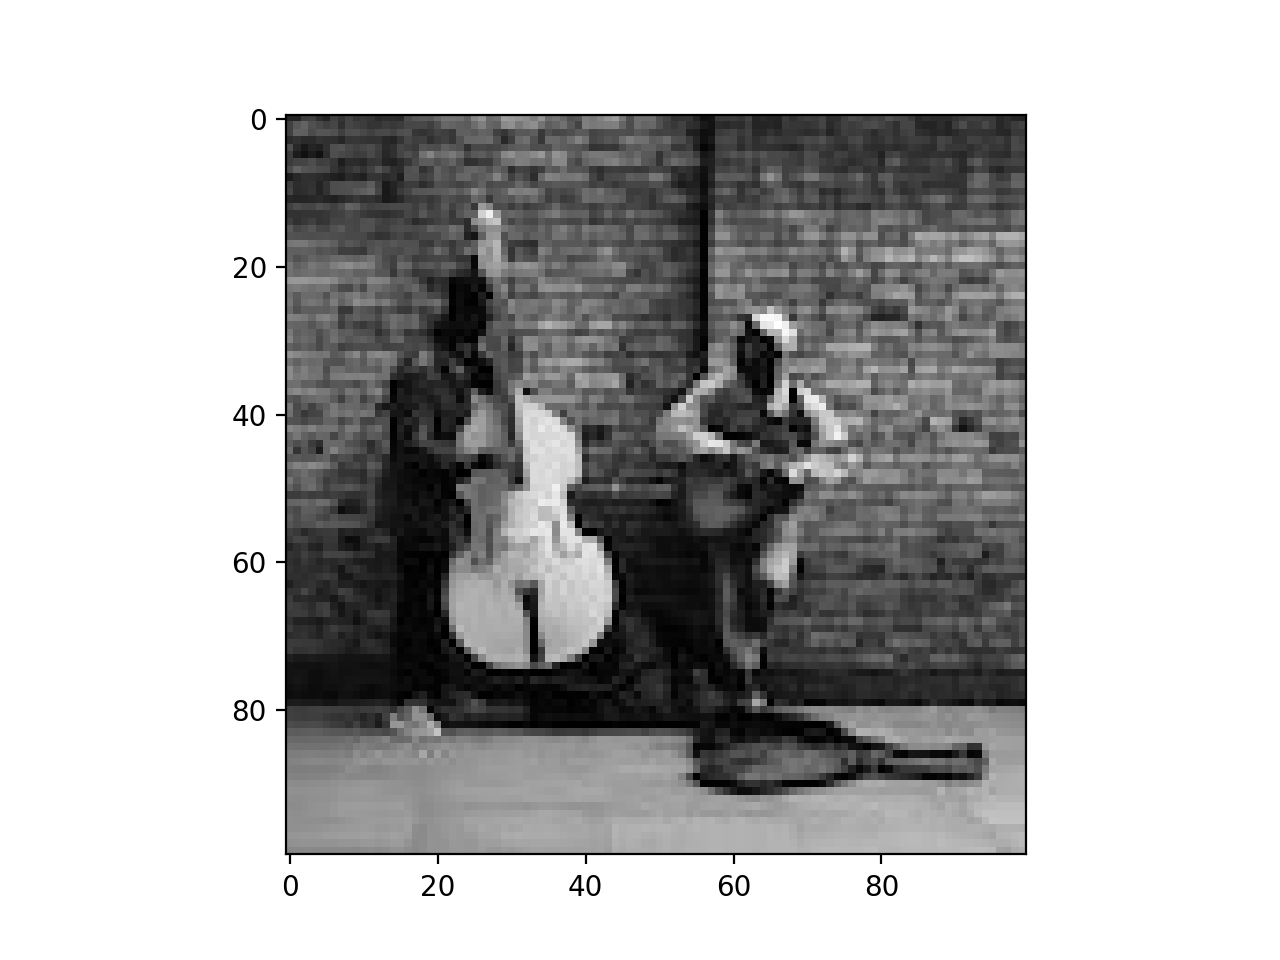

In [66]:
plt.figure()
plt.imshow(greyscale, cmap='gray')

<IPython.core.display.Javascript object>


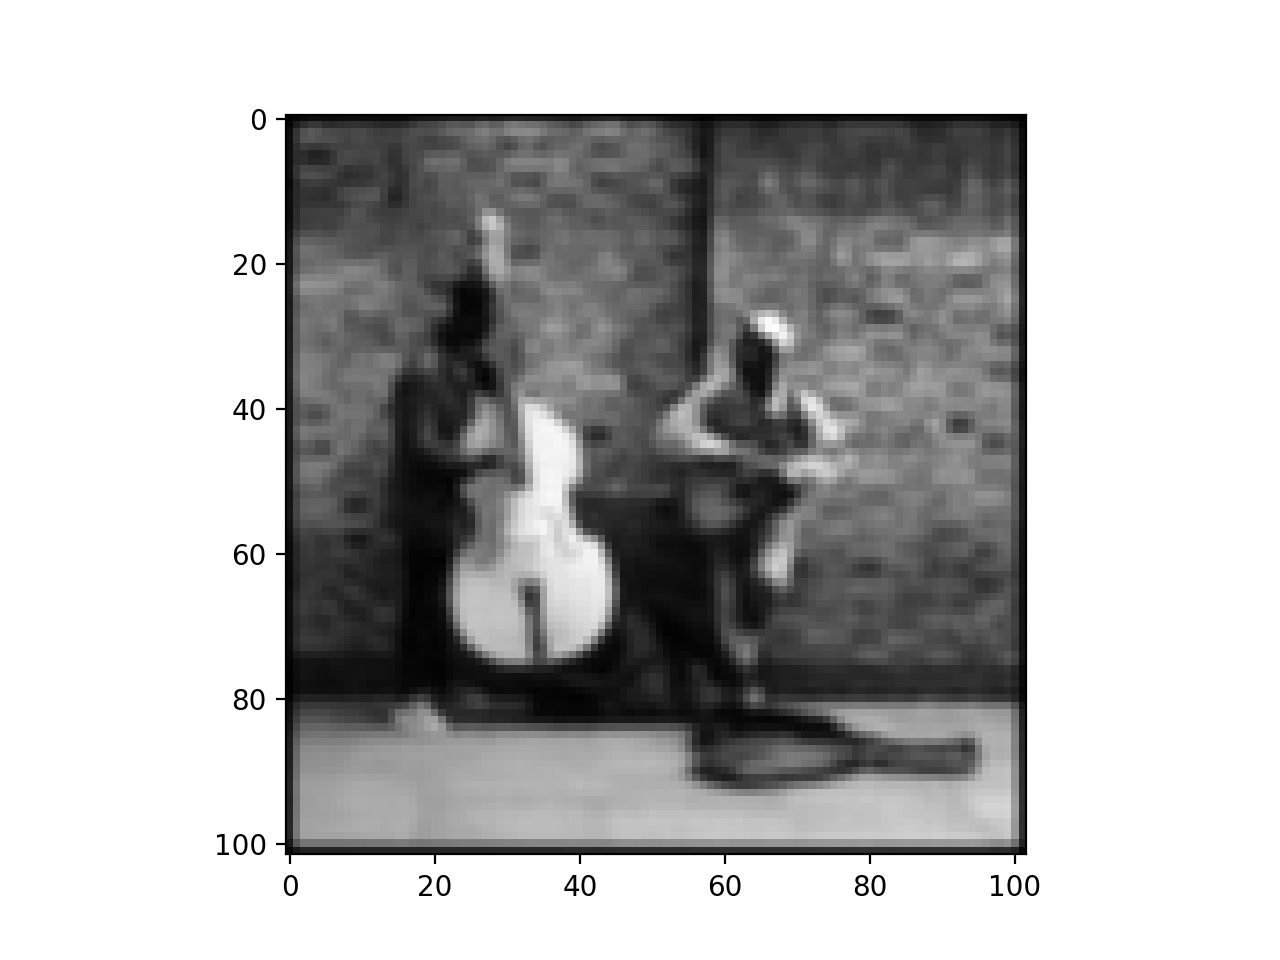

In [67]:
plt.figure()
plt.imshow(convolved[:, :, 0], cmap='gray')

<IPython.core.display.Javascript object>


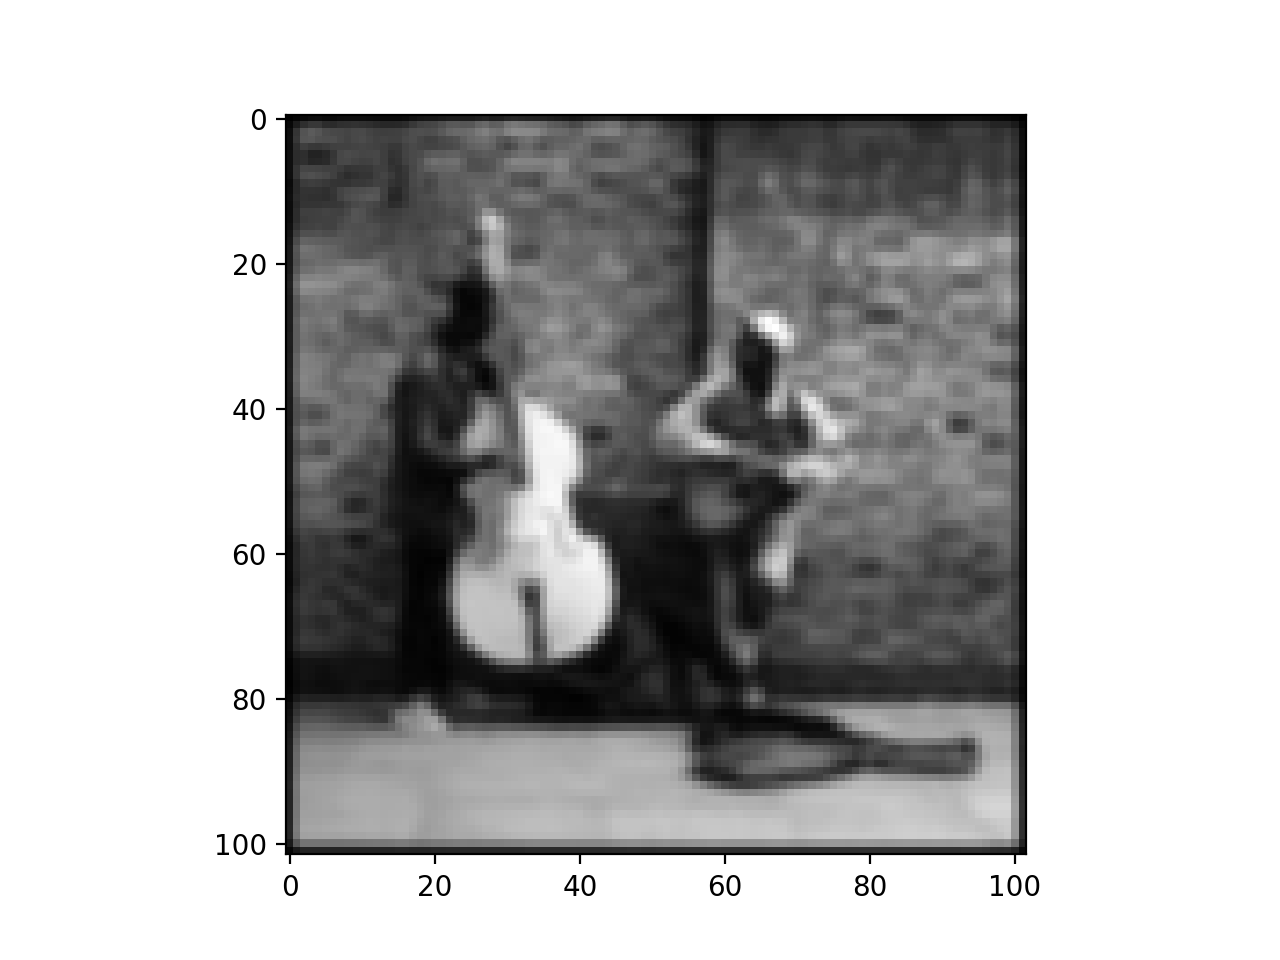

In [68]:
conv_scipy = convolve2d(greyscale, gaussian_kernel[:, :, 0, 0])
plt.figure()
plt.imshow(conv_scipy, cmap='gray')

In [63]:
err = np.abs(convolved[:, :, 0] - conv_scipy)
mse = np.sum(err**2) / (err.size)
print("MSE distance per pixel", mse)

MSE distance per pixel 0.30879364961908407
